# Generation of the plots in paper

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle

# Difference in Depth

In [3]:
df_depths = pd.read_csv('data/results_means.csv', index_col=0)

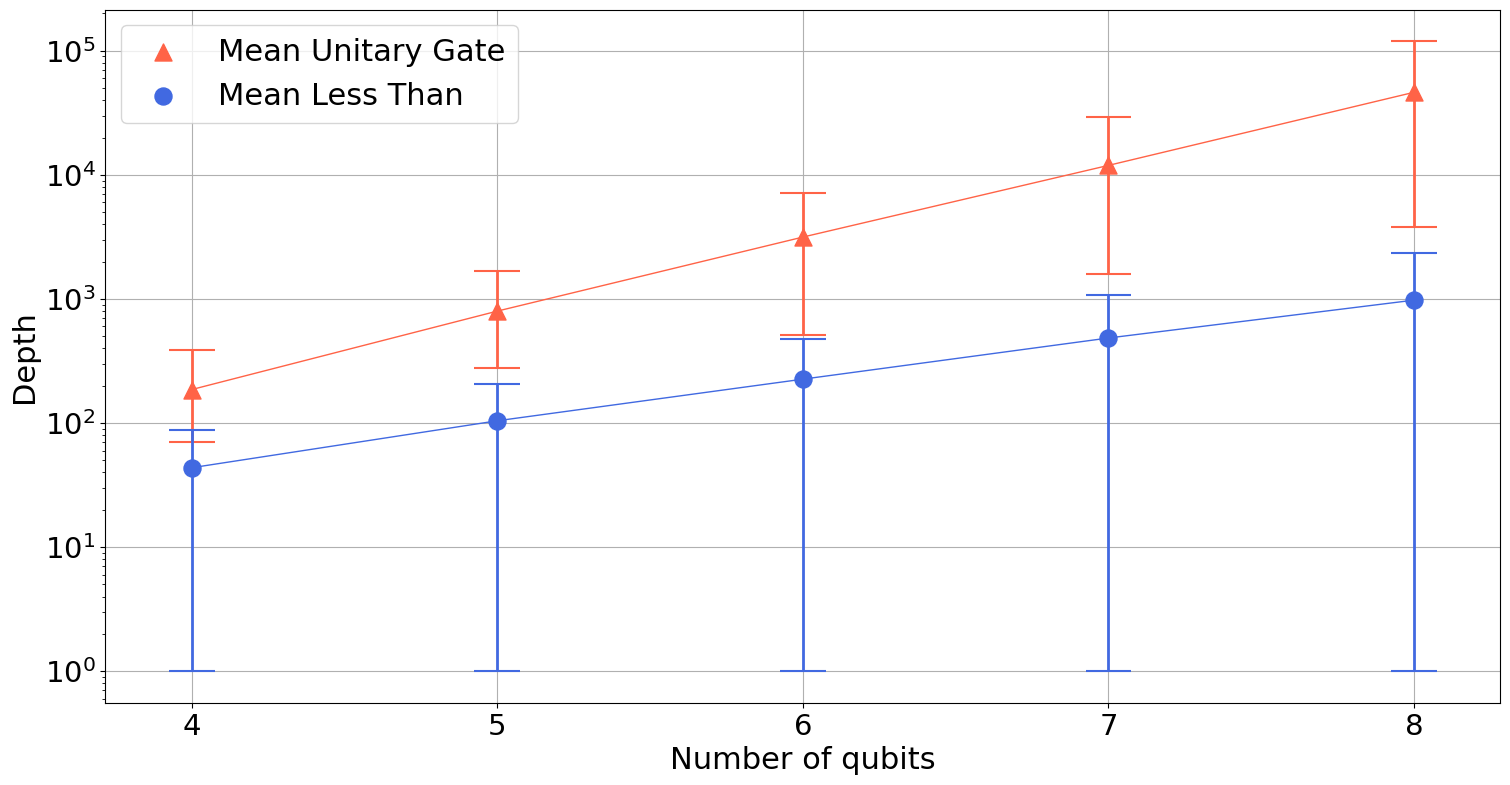

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(18,9))

x = df_depths.index.tolist()
y_UG = df_depths['UG_depth_mean'].values
y_UG_min = df_depths['UG_depth_min'].values
y_UG_max = df_depths['UG_depth_max'].values

y_LT = df_depths['LT_depth_mean'].values
y_LT_min = df_depths['LT_depth_min'].values
y_LT_max = df_depths['LT_depth_max'].values


#  mean +- std parameters
linewidth_std = 1

size_scatter = 150

error_cap = 0.15


# Unitary Gate

ax.scatter(x, y_UG, marker='^', s=size_scatter, facecolor='tomato', label='Mean Unitary Gate', zorder=4)
ax.plot(x, y_UG, c='tomato', linewidth=linewidth_std, zorder=5)

for i, v in enumerate(y_UG_min):
    ax.vlines(x=i+4, ymin=v, ymax=y_UG_max[i], linewidths=2, color='tomato')
    ax.hlines(y=v, xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='tomato')
    ax.hlines(y=y_UG_max[i], xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='tomato')

# Less Than

ax.scatter(x, y_LT, marker='o', s=size_scatter, facecolor='royalblue', label='Mean Less Than', zorder=4)
ax.plot(x, y_LT, c='royalblue', linewidth=linewidth_std, zorder=5)


for i, v in enumerate(y_LT_min):
    ax.vlines(x=i+4, ymin=v, ymax=y_LT_max[i], linewidths=2, color='royalblue')
    ax.hlines(y=v, xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='royalblue')
    ax.hlines(y=y_LT_max[i], xmin=i+4-error_cap/2, xmax=i+4+error_cap/2, color='royalblue')


ax.grid(True, zorder=0)

fontsize = 22

# ax.set_title('Comparison between methods', fontsize=fontsize+2)

ax.set_xticks(df_depths.index)
ax.set_xticklabels(df_depths.index)

ax.set_xlabel('Number of qubits',fontsize=fontsize)
ax.set_ylabel('Depth',fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='upper left')

ax.set_yscale('log')

ax.tick_params(labelsize=fontsize-1)

# Histogram Plot of a Simulation

In [47]:
df_simulation = pd.read_csv('data/less_than_13_with_6_qubits_2e4_shots.csv', index_col=0).squeeze()

The number of qubits is known:

In [48]:
nqubits = 6
number = 13

In [49]:
df_simulation.index = [int(str(x), 2) for x in df_simulation.index]

In [50]:
dic_results = dict(zip([x for x in df_simulation.index.tolist()], df_simulation.values.tolist()))

In [51]:
x = list(range(2**nqubits))
y = [dic_results.get(a, 0) for a in x]

In [61]:
x_desired = x[:number]
x_undesired = x[number:]
y_desired = y[:number]
y_undesired = y[number:]

In [62]:
n_shots_plot = sum(y)

In [63]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['desired states','undesired states']

rotation_xticks=0

fontsize=45

# Label and ticks

yticks_size=fontsize-5

xticks_size=fontsize-5
xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.07, 0.5)

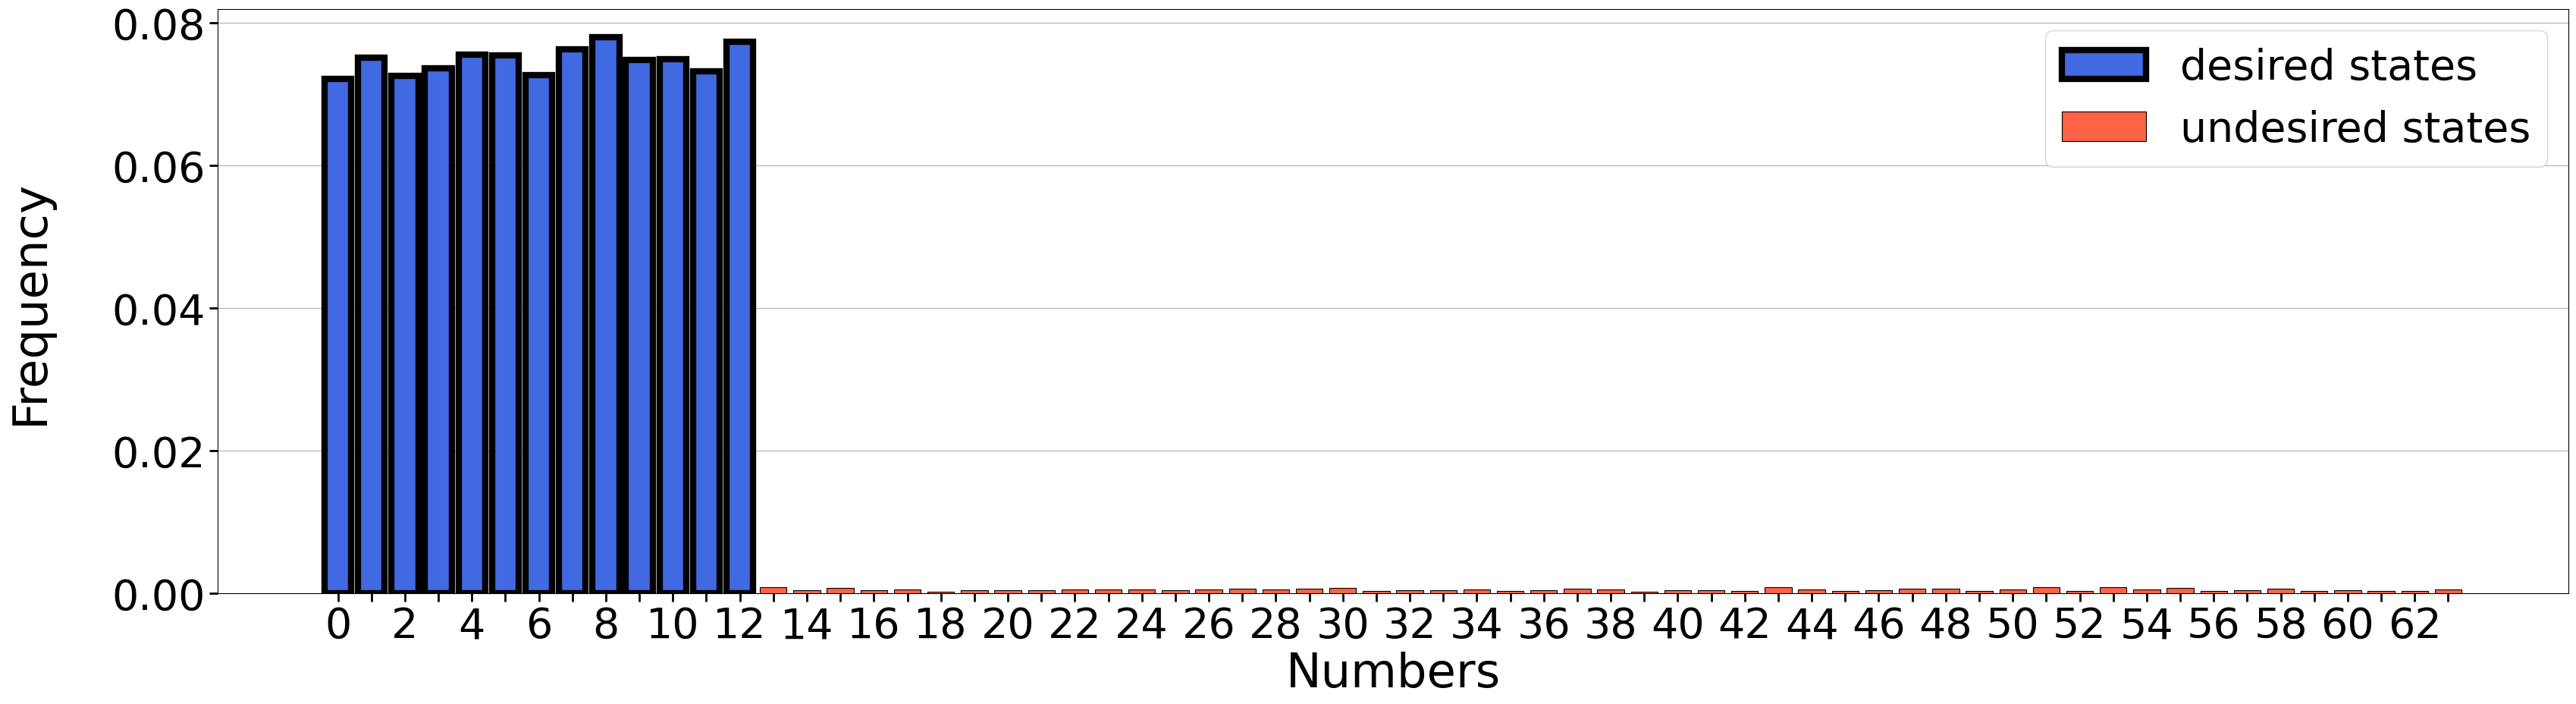

In [64]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/n_shots_plot for y_element in y_desired], zorder=3,
       edgecolor='k', label='desired states', color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/n_shots_plot for y_element in y_undesired], zorder=3,
       edgecolor='k', label='undesired states', color='tomato', linewidth=0.8)

ax.set_xticks(x)

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

ax.set_xticklabels([str(a) if a%2==0 else ' ' for a in range(2**nqubits)])
    

ax.legend(fontsize=fontsize-5)

ax.tick_params(width=2, size=8)
